<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:180%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:#AB8111'><center> <b>                GOLD PRICE PREDICTION </center></h1>

<a id="2"></a>

## <b>1 <span style='color:#AB8111'>|</span> IMPORTING NECESSARY LIBRARIES</b>

In [14]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error
# !pip install keras-tuner --upgrade
# from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<a id="3"></a>

## <b>2 <span style='color:#AB8111'>|</span> LOAD DATASET</b>

In [53]:
df = pd.read_csv("gold_old.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


<a id="4.1"></a>

## <b>3 <span style='color:#AB8111'>|</span> Basic information about dataset</b>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
# df.drop(['Volume', 'Currency'], axis=1, inplace=True)

In [19]:
df.shape

(2290, 6)

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [21]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [22]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


<a id="2"></a>

## <b>4 <span style='color:#AB8111'>|</span> CHECKING FOR NULL AND DUPLICATES</b>



In [23]:
df.duplicated().sum()

0

In [24]:
df.dropna()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


<a id="6"></a>

## <b>5<span style='color:#AB8111'>|</span> DATA PREPROCESSING</b>

In [25]:
data = df.filter(['GLD'])
data.head().style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                    "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})


,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999


In [26]:
data.dropna()
dataset = data.values

In [27]:
dataset[0:5]

array([[84.860001],
       [85.57    ],
       [85.129997],
       [84.769997],
       [86.779999]])

In [28]:
training_data_len = int(np.ceil( len(dataset) * .80 ))
print("Training data length: ", training_data_len)

Training data length:  1832


<a id="6.4"></a>

## <b>6<span style='color:#AB8111'>|</span> Normalization</b>

In [29]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.12967974],
       [0.13587574],
       [0.13203593],
       ...,
       [0.48154291],
       [0.47552142],
       [0.45853741]])

<a id="6.5"></a>

## <b>7<span style='color:#AB8111'>|</span> Creating training dataset</b>

In [30]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train, "\n")
        print(y_train)

[array([0.12967974, 0.13587574, 0.13203593, 0.1288943 , 0.14643511,
       0.14442799, 0.15926347, 0.16214332, 0.170521  , 0.15699449,
       0.14573695, 0.14399163, 0.15202023, 0.15856531, 0.15612182,
       0.17523346, 0.17715336, 0.18980715, 0.1845711 , 0.19251242,
       0.18675279, 0.16886289, 0.1666812 , 0.15428921, 0.16537218,
       0.17322627, 0.18326207, 0.18614192, 0.16868839, 0.16964833,
       0.17200454, 0.16711757, 0.18832361, 0.20281001, 0.20289729,
       0.20411903, 0.19844663, 0.2069116 , 0.21624924, 0.22680861,
       0.22846672, 0.23771707, 0.21973995, 0.24190594, 0.23125928,
       0.22768127, 0.22576144, 0.22680861, 0.23570995, 0.24731649,
       0.25054542, 0.25455973, 0.23125928, 0.20106468, 0.17374993,
       0.17540796, 0.1983594 , 0.20769704, 0.20472991, 0.1909416 ])] 

[0.14713327156412492]
[array([0.12967974, 0.13587574, 0.13203593, 0.1288943 , 0.14643511,
       0.14442799, 0.15926347, 0.16214332, 0.170521  , 0.15699449,
       0.14573695, 0.14399163, 0.1

<a id="6.6"></a>

#### <b>7.1<span style='color:#AB8111'>|</span> Convert x_train and y_train to array</b>

In [31]:
x_train = np.array(x_train)
y_train = np.array(y_train)

<a id="6.7"></a>

#### <b>7.2<span style='color:#AB8111'>|</span> Reshaping the data</b>

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("The shape of x_train set:", x_train.shape)

The shape of x_train set: (1772, 60, 1)


In [33]:
x_train

array([[[0.12967974],
        [0.13587574],
        [0.13203593],
        ...,
        [0.20769704],
        [0.20472991],
        [0.1909416 ]],

       [[0.13587574],
        [0.13203593],
        [0.1288943 ],
        ...,
        [0.20472991],
        [0.1909416 ],
        [0.14713327]],

       [[0.13203593],
        [0.1288943 ],
        [0.14643511],
        ...,
        [0.1909416 ],
        [0.14713327],
        [0.16816474]],

       ...,

       [[0.30316781],
        [0.29854263],
        [0.3029933 ],
        ...,
        [0.41591767],
        [0.40963438],
        [0.42420807]],

       [[0.29854263],
        [0.3029933 ],
        [0.28815776],
        ...,
        [0.40963438],
        [0.42420807],
        [0.43660006]],

       [[0.3029933 ],
        [0.28815776],
        [0.29740818],
        ...,
        [0.42420807],
        [0.43660006],
        [0.43677463]]])

<a id="7"></a>

## <b>8<span style='color:#AB8111'>|</span> LONG SHORT-TERM MEMORY (LSTM) Model</b>

<a id="7.1"></a>

#### <b>8.1<span style='color:#AB8111'>|</span> Building and training LSTM model</b>

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 64, epochs = 100)

Epoch 1/100
28/28 [==============================] - 6s 103ms/step - loss: 0.0217
Epoch 2/100
28/28 [==============================] - 3s 100ms/step - loss: 0.0017
Epoch 3/100
28/28 [==============================] - 3s 100ms/step - loss: 9.6736e-04
Epoch 4/100
28/28 [==============================] - 3s 104ms/step - loss: 8.9718e-04
Epoch 5/100
28/28 [==============================] - 3s 101ms/step - loss: 8.7132e-04
Epoch 6/100
28/28 [==============================] - 3s 99ms/step - loss: 8.5928e-04
Epoch 7/100
28/28 [==============================] - 3s 98ms/step - loss: 8.4440e-04
Epoch 8/100
28/28 [==============================] - 3s 97ms/step - loss: 8.3561e-04
Epoch 9/100
28/28 [==============================] - 3s 98ms/step - loss: 7.8790e-04
Epoch 10/100
28/28 [==============================] - 3s 100ms/step - loss: 7.7454e-04
Epoch 11/100
28/28 [==============================] - 3s 101ms/step - loss: 7.7087e-04
Epoch 12/100
28/28 [==============================] - 3s 100ms/s

<a id="7.2"></a>

#### <b>8.2<span style='color:#AB8111'>|</span> Create testing dataset</b>

In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

<a id="7.3"></a>

#### <b>8.3<span style='color:#AB8111'>|</span> Converting test data to array and reshaping it</b>

In [36]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [37]:
x_test.shape

(458, 60, 1)

<a id="7.4"></a>

#### <b>8.4<span style='color:#AB8111'>|</span> Predicted prices</b>

In [38]:
predictions1 = model.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)
predictions1[0:10]

15/15 [==============================] - 1s 25ms/step


array([[119.25506 ],
       [117.65752 ],
       [117.60253 ],
       [119.04317 ],
       [119.13654 ],
       [119.43146 ],
       [118.6291  ],
       [118.67143 ],
       [118.975464],
       [120.75841 ]], dtype=float32)

<a id="7.6"></a>

## <b>9<span style='color:#AB8111'>|</span> Ploting the data</b>

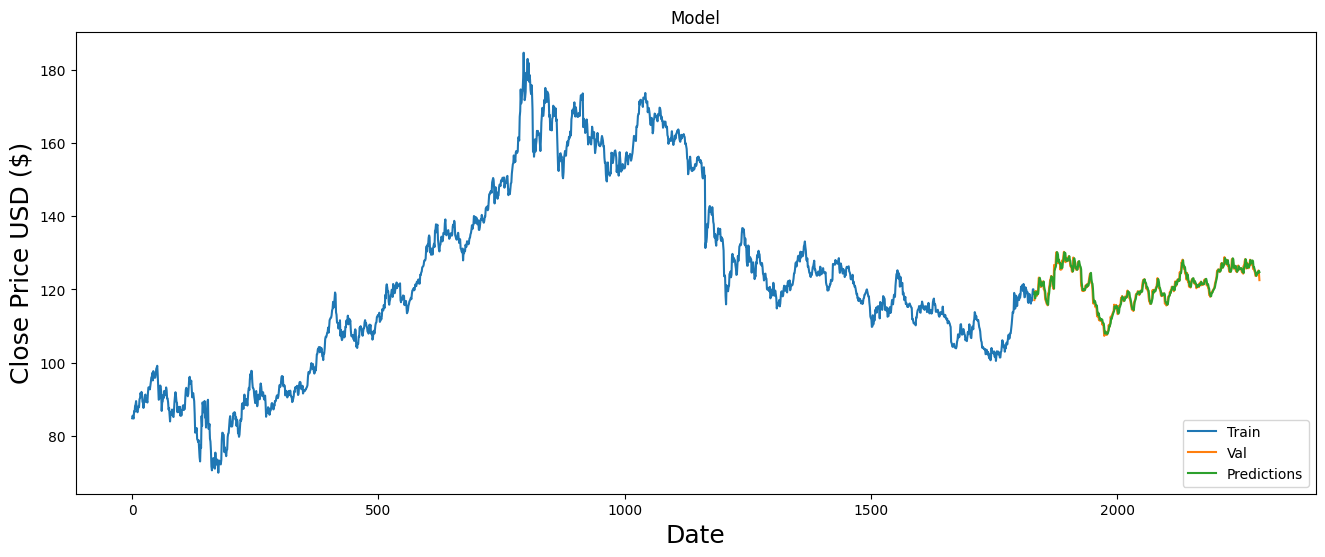

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions1
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['GLD'])
plt.plot(valid[['GLD', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

<a id="7.5"></a>

## <b>10<span style='color:#AB8111'>|</span>Error Scores</b>

In [40]:
mae = mean_absolute_error(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions1)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.735612705037613
Mean Squared Error (MSE): 1.0230848526693674
Root Mean Squared Error (RMSE): 1.011476570499469
R-squared (R²): 0.9563405218718033


<a id="7.5"></a>

## <b>11<span style='color:#AB8111'>|</span>Comparisons</b>

In [41]:
valid.head(n = 10)

,GLD,Predictions
1832,117.110001,119.255058
1833,117.739998,117.657516
1834,119.580002,117.602531
1835,118.970001,119.043167
1836,119.419998,119.136543
1837,118.230003,119.431458
1838,118.699997,118.629097
1839,119.040001,118.671432
1840,121.290001,118.975464
1841,123.239998,120.758408


In [42]:
predictions1

array([[119.25506 ],
       [117.65752 ],
       [117.60253 ],
       [119.04317 ],
       [119.13654 ],
       [119.43146 ],
       [118.6291  ],
       [118.67143 ],
       [118.975464],
       [120.75841 ],
       [122.821724],
       [123.19    ],
       [122.57732 ],
       [122.19494 ],
       [121.0024  ],
       [120.88886 ],
       [121.79253 ],
       [121.4002  ],
       [121.720314],
       [122.157265],
       [120.68206 ],
       [120.00015 ],
       [119.47701 ],
       [117.82893 ],
       [117.09312 ],
       [116.66439 ],
       [116.21866 ],
       [116.029396],
       [115.81279 ],
       [118.11766 ],
       [118.90147 ],
       [120.33278 ],
       [121.23838 ],
       [122.463554],
       [122.87415 ],
       [123.58987 ],
       [122.771576],
       [123.07992 ],
       [121.407074],
       [120.913994],
       [120.2597  ],
       [125.09167 ],
       [125.696686],
       [126.0215  ],
       [126.49275 ],
       [128.9188  ],
       [130.18904 ],
       [130.0

<a id="7"></a>

## <b>12<span style='color:#AB8111'>|</span> Random Forest Regression Model</b>

In [43]:
X = df.drop(['Date', 'GLD'], axis=1)  #Feature Variable
Y = df['GLD']  #Target Variable
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


<a id="7"></a>

## <b>13<span style='color:#AB8111'>|</span> Train and Test Split</b>

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<a id="7.1"></a>

## <b>14<span style='color:#AB8111'>|</span> Building and training Random Forest model</b>

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

<a id="7.4"></a>

## <b>15<span style='color:#AB8111'>|</span> Predicted prices</b>

In [46]:
prediction

array([113.82519987, 147.68230172, 140.84549877, 112.53380161,
       113.63999941,  95.55069942, 111.83409985,  93.32559965,
       120.99230044, 127.06149939, 147.79369985, 120.50759856,
       119.35730018,  88.09980051,  96.13820028,  92.71009858,
       116.72370056,  89.10069876, 125.34580103, 114.80550033,
       119.12039922, 152.59460303, 122.78109805, 120.02079973,
       171.17500005, 108.23089835, 120.60970073,  87.15489851,
        88.1655004 ,  88.22659898, 121.39660033, 154.29390189,
       149.2744992 , 125.98479995, 126.74659984,  90.73189879,
       158.73250021, 121.26670197, 106.69420069, 144.40659709,
        92.70699962, 127.56710083, 117.48540077, 152.91240188,
       119.43559962,  91.34140172,  79.77579978, 120.10040154,
       132.10690078, 118.99899908, 127.16600065, 165.87070078,
       153.12010063,  92.56629906, 149.23750078, 152.3390996 ,
       112.88749999, 112.73230035,  87.17849931, 127.79749882,
       125.18610072, 151.54900285, 114.54189988, 110.57

<a id="7.6"></a>

## <b>20<span style='color:#AB8111'>|</span> Ploting the data</b>

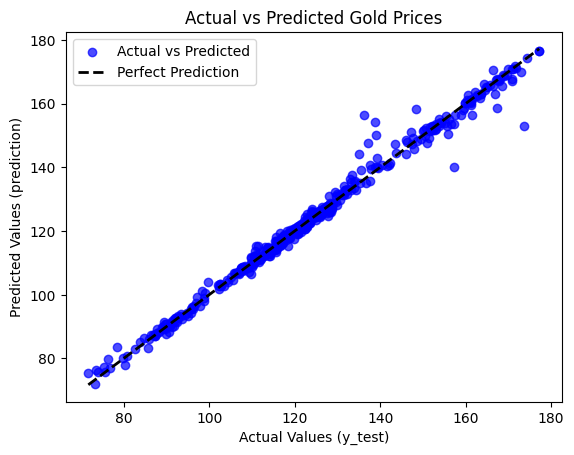

In [47]:

y_test = np.array(y_test)
prediction = np.array(prediction)

# Create a scatter plot with a regression line
plt.scatter(y_test, prediction, color='blue', label='Actual vs Predicted', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (prediction)')
plt.legend()
plt.show()


<a id="7.5"></a>

## <b>21<span style='color:#AB8111'>|</span>Comparisons</b>

In [48]:
valid.head(n = 10)

,GLD,Predictions
1832,117.110001,119.255058
1833,117.739998,117.657516
1834,119.580002,117.602531
1835,118.970001,119.043167
1836,119.419998,119.136543
1837,118.230003,119.431458
1838,118.699997,118.629097
1839,119.040001,118.671432
1840,121.290001,118.975464
1841,123.239998,120.758408


In [49]:
len(prediction)

458

In [50]:
prediction[len(prediction)-2]

165.12659850000003

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<a id="7.5"></a>

## <b>22<span style='color:#AB8111'>|</span>Error Scores</b>

In [52]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.243025318449781
Mean Squared Error (MSE): 5.9331298702326425
Root Mean Squared Error (RMSE): 2.4358016894305337
R-squared (R²): 0.9887576963527407
